In [ ]:
# Wine Quality Dataset
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
# print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import kagglehub

In [ ]:
# Wine Quality Dataset
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
# print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

In [2]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [3]:
df = pd.read_csv(path+"/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Get unique values from the 'Name' column
uni_quality = df['quality'].unique()
print(uni_quality)

[5 6 7 4 8 3]


In [5]:
# Define features (X) and target (y)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # 

Logistic Regression model accuracy (in %): 47.59825327510917


<Axes: >

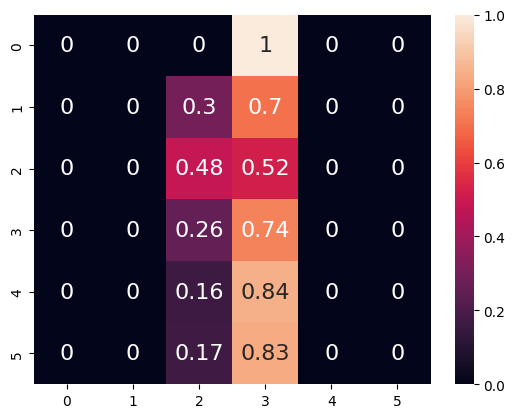

In [6]:
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.20,
                                   random_state=23)

# LogisticalRegression
clf = LogisticRegression(random_state=0)
# train the model
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

# class_report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(class_report)

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})

Desicion tree accuracy score: 56.33187772925764 %


<Axes: >

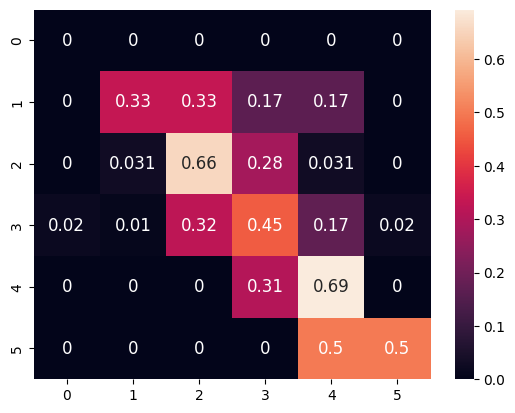

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Desicion tree accuracy score: {accuracy *100} %')

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':12})

In [ ]:
# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [ ]:
#  pvz
import pandas as pd

# Sample dataset (you can replace this with a larger MovieLens dataset)
# data = {
#     'Title': ['The Matrix', 'Inception', 'The Dark Knight', 'Interstellar', 'The Godfather', 'Pulp Fiction'],
#     'Genre': ['Action|Sci-Fi', 'Action|Sci-Fi', 'Action|Crime', 'Adventure|Sci-Fi', 'Crime|Drama', 'Crime|Drama'],
#     'Rating': [8.7, 8.8, 9.0, 8.6, 9.2, 8.9],
#     'Release Year': [1999, 2010, 2008, 2014, 1972, 1994]
# }

# # Convert data into DataFrame
# df = pd.DataFrame(data)

# def recommend_movie():
#     print("Please provide the following parameters to get movie recommendations:")
    
#     # Collecting user input
#     genre_input = input("Enter genre (e.g., Action|Sci-Fi): ").strip()
#     rating_input = input("Enter minimum rating (e.g., 8.0): ").strip()
#     year_input = input("Enter a preferred release year (e.g., 2000): ").strip()
    
#     # Convert rating_input and year_input to proper types
#     rating_input = float(rating_input) if rating_input else None
#     year_input = int(year_input) if year_input else None
    
#     # Filter the DataFrame based on user inputs
#     filtered_movies = df

#     if genre_input:
#         filtered_movies = filtered_movies[filtered_movies['Genre'].str.contains(genre_input, case=False)]
    
#     if rating_input:
#         filtered_movies = filtered_movies[filtered_movies['Rating'] >= rating_input]
    
#     if year_input:
#         filtered_movies = filtered_movies[filtered_movies['Release Year'] == year_input]
    
#     # Recommend movies
#     if not filtered_movies.empty:
#         print("\nRecommended Movies based on your criteria:")
#         print(filtered_movies[['Title', 'Genre', 'Rating', 'Release Year']])
#     else:
#         print("Sorry, no movies match your criteria.")

# # Run the recommendation function
# recommend_movie()


In [8]:
from datetime import datetime

In [23]:
ratings = pd.read_csv('../../../eismas/ml-32m/ratings.csv')
ratings.head(2)


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228


In [24]:
def convert_timestamp_to_datetime(x):
    dt_object = datetime.fromtimestamp(x)
    return dt_object

In [25]:

ratings['datetime'] = ratings['timestamp'].apply(convert_timestamp_to_datetime)
ratings.head(2)

,userId,movieId,rating,timestamp,datetime
0,1,17,4.0,944249077,1999-12-03 21:24:37
1,1,25,1.0,944250228,1999-12-03 21:43:48


In [ ]:
ratings.columns

In [27]:
ratings_gr = ratings.groupby('movieId').agg(
    rating_list=('rating', list),         # Collect ratings into a list
    timestamp_list=('timestamp', list),   # Collect timestamps into a list
    datetime_list=('datetime', list)      # Collect datetimes into a list
).reset_index()

ratings_gr.head(2)

: 

: 

In [26]:
# vidurinam ratinga
ratings_gr1 = ratings.groupby('movieId').agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count'),
    timestamp=('timestamp', 'min'),
    datetime=('datetime', 'min')
).reset_index()

ratings_gr1.head(2)

,movieId,rating_mean,rating_count,timestamp,datetime
0,1,3.897438,68997,822873600,1996-01-29 02:00:00
1,2,3.275758,28904,822873600,1996-01-29 02:00:00


In [ ]:
movie_ratings_df = ratings.groupby('movieId')['rating'].apply(list).reset_index()

# Rename columns for clarity
# movie_t_df.columns = ['movieId', 'tags']

# Show the resulting DataFrame
movie_ratings_df.head(2)

In [ ]:
# max_rating = ratings['timestamp'].min()
# print(max_rating)
# print("Maximum rating:", max_rating)
timestamp = 52 # Replace with your timestamp
dt_object = datetime.fromtimestamp(timestamp)
print("Converted Datetime:", dt_object)



In [10]:
movies = pd.read_csv('../../../eismas/ml-32m/movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [21]:
def get_movie_year(x):
    if '(' in x:
        year = x.rsplit('(', 1)[1].strip(')') #rstplit - splitina per pirmą norimą simbolį nuo dešinės
        return year
    else:
        return 'Nenurodyta'

# print(get_movie_year('City of Lost Children, The (Cité des enfants perdus, La) (1995)'))   
movies['movie_year'] = movies['title'].apply(get_movie_year)
movies.head(2)


,movieId,title,genres,movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995


In [22]:
uni_year = movies['movie_year'].unique()
print(uni_year)

['1995' '1994' '1996' '1976' '1992' '1988' '1967' '1993' '1964' '1977'
 '1965' '1982' '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1973'
 '1970' '1960' '1955' '1959' '1968' '1980' '1975' '1986' '1948' '1943'
 '1950' '1946' '1987' '1997' '1974' '1956' '1958' '1949' '1972' '1998'
 '1933' '1952' '1951' '1957' '1961' '1954' '1934' '1944' '1963' '1942'
 '1941' '1953' '1939' '1947' '1945' '1938' '1935' '1936' '1926' '1932'
 '1985' '1979' '1971' '1978' '1966' '1962' '1983' '1984' '1931' '1922'
 '1999' '1927' '1929' '1930' '1928' '1925' '1914' '2000' '1919' '1923'
 '1920' '1918' '1921' '2001' '1924' '2002' '2003' '1915' '2004' '1916'
 '1917' '1948) ' '1965) ' '1988) ' '1999) ' '2005' '2006' '1995) ' '1902'
 '2001) ' '1989) ' '1971) ' '1903' '2007' '2002) ' '2006) ' '2008'
 '1980) ' '2009' '1912' '2008) ' '2010' 'Das Millionenspiel' '2009) '
 '2010) ' '1913' '2011' '1898' '1899' '1983) ' '1929) ' '1949) ' '2004) '
 '2011) ' '1894' '1937) ' '1970) ' '1998) ' '2012' '1986) ' '2007) '
 '1928)

In [ ]:
tags = pd.read_csv('../../../eismas/ml-32m/tags.csv')
tags['timestamp2'] = tags['timestamp']
tags.head(2)

In [ ]:
# Group by movieid and aggregate tags into a list
# movie_tags_df = tags.groupby('movieId')['tag'].apply(lambda x: ', '.join(x)).reset_index()
movie_tags_df = tags.groupby('movieId')['tag'].apply(list).reset_index()

# Rename columns for clarity
movie_tags_df.columns = ['movieId', 'tags']

# Show the resulting DataFrame
movie_tags_df.head(2)

In [ ]:
links = pd.read_csv('../../../eismas/ml-32m/links.csv')
links.head(2)

In [ ]:
# Merge the DataFrames on 'movieId'
merged_df = pd.merge(ratings, movie_tags_df, on='movieId', how='inner')
merged_df.head(2)

In [ ]:
merged_df.info()